## Word Embedding using Word2Vec

In [ ]:
!pip install nltk
!pip install gensim

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving alice.txt to alice (3).txt
User uploaded file "alice.txt" with length 148574 bytes


In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
warnings.filterwarnings(action = 'ignore') 
import gensim 
from gensim.models import Word2Vec 

sample = open("alice.txt", "r") 
s = sample.read() 

In [ ]:
import nltk
nltk.download('punkt')
# Replaces escape character with space 
f = s.replace("\n", " ") 
data = [] 

# iterate through each sentence in the file 
for i in sent_tokenize(f): 
	temp = [] 
	
	# tokenize the sentence into words 
	for j in word_tokenize(i): 
		temp.append(j.lower()) 

	data.append(temp) 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Create CBOW model 
model1 = gensim.models.Word2Vec(data, min_count = 1, 
							size = 100, window = 5) 
# Print results 
print("Cosine similarity between 'alice' " +
			"and 'wonderland' - CBOW : ", 
	model1.similarity('alice', 'wonderland')) 
	
print("Cosine similarity between 'alice' " +
				"and 'machines' - CBOW : ", 
	model1.similarity('alice', 'machines')) 

# Create Skip Gram model 
model2 = gensim.models.Word2Vec(data, min_count = 1, size = 100, 
											window = 5, sg = 1) 

# Print results 
print("Cosine similarity between 'alice' " +
		"and 'wonderland' - Skip Gram : ", 
	model2.similarity('alice', 'wonderland')) 
	
print("Cosine similarity between 'alice' " +
			"and 'machines' - Skip Gram : ", 
	model2.similarity('alice', 'machines')) 

KeyError: ignored

Output indicates the cosine similarities between word vectors ‘alice’, ‘wonderland’ and ‘machines’ for different models. One interesting task might be to change the parameter values of ‘size’ and ‘window’ to observe the variations in the cosine similarities.
 

Applications of Word Embedding :

>> Sentiment Analysis
>> Speech Recognition
>> Information Retrieval
>> Question Answering

In [1]:
from gensim.models import Word2Vec
# define training data
sentences = [['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec'],
['this', 'is', 'the', 'second', 'sentence'],
['yet', 'another', 'sentence'],
['one', 'more', 'sentence'],
['and', 'the', 'final', 'sentence']]


In [5]:
# train model
model = Word2Vec(sentences, min_count=1)
# summarize the loaded model
print(model)


Word2Vec(vocab=14, size=100, alpha=0.025)


In [6]:
# summarize vocabulary
words = list(model.wv.vocab)
print(words)


['this', 'is', 'the', 'first', 'sentence', 'for', 'word2vec', 'second', 'yet', 'another', 'one', 'more', 'and', 'final']


In [7]:
# access vector for one word
print(model['sentence'])


[-4.26890096e-03 -3.94560024e-03 -1.09491644e-04  7.84998236e-04
  4.59498406e-04 -2.60084774e-03  9.37499863e-04 -1.70112087e-03
  6.58053323e-04 -6.76374708e-04  3.27984162e-04  2.43605906e-03
 -4.02759819e-04  3.73805687e-03 -1.85210072e-03  3.22606624e-03
  4.47979057e-03  3.83531256e-03 -7.83951022e-04 -1.71888125e-04
  4.90211090e-03  8.36569583e-04 -5.63664071e-04  3.06873978e-03
 -2.39303708e-03  1.74906082e-03 -1.57540955e-03 -2.42321822e-03
 -8.39541492e-04 -1.06984538e-04 -2.95666791e-03  1.73724187e-03
  4.42770775e-03  1.98380952e-03  3.79283424e-03 -3.40972142e-03
  1.64687820e-03 -2.34330073e-04 -2.31883139e-03  1.12625840e-03
  2.94603431e-03 -3.03493789e-03  3.06476164e-03 -8.73201876e-04
 -2.88817240e-03  4.25543031e-03 -3.72822490e-03  1.18658529e-03
  2.74329190e-03 -2.36804481e-03  2.40555441e-04  2.83435627e-04
  1.17586600e-03  2.66616675e-03 -2.99808290e-03 -2.15250393e-03
 -1.19193469e-03  2.40410725e-03 -2.47997348e-03 -2.77072797e-03
 -4.60592657e-03  1.34520

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [8]:
# save model
model.save('model.bin')
# load model
new_model = Word2Vec.load('model.bin')
print(new_model)

Word2Vec(vocab=14, size=100, alpha=0.025)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


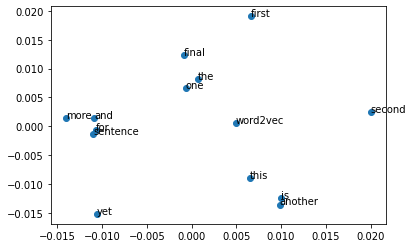

In [11]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

# train model
model = Word2Vec(sentences, min_count=1)
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()


In [12]:
# en_core_web_sm/md/lg can be right for small,medium,large
!python3 -m spacy download en_core_web_sm
!pip3 install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-2.2.0/en_core_web_sm-2.2.0.tar.gz

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
     |████████████████████████████████| 12.0MB 290kB/s 
  Created wheel for en-core-web-sm: filename=en_core_web_sm-2.2.0-cp36-none-any.whl size=12019126 sha256=f05fadd80a6be9346b5e2387d2d734717a627debcac58164199792e7ead06017
  Stored in directory: /root/.cache/pip/wheels/48/5c/1c/15f9d02afc8221a668d2172446dd8467b20cdb9aef80a172a4
Successfully built en-core-web-sm
  Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5


In [13]:
#!python3 -m spacy download en_core_web_sm
import spacy
nlp = spacy.load('en_core_web_sm')

In [14]:
# number of dimension for word "lion" in spacy (en_core_web_sm)
nlp(u'lion').vector.shape

(96,)

In [17]:
doc = nlp(u'The quick brown fox jumped over the lazy dogs.')

# average number of dimension of all words in doc
doc.vector.shape

(96,)

In [18]:
# Create a three-token Doc object:
tokens = nlp(u'lion cat pet')

# Iterate through token combinations:
for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

lion lion 1.0
lion cat 0.3682378
lion pet 0.17687283
cat lion 0.3682378
cat cat 1.0
cat pet 0.38982964
pet lion 0.17687283
pet cat 0.38982964
pet pet 1.0


/usr/lib/python3.6/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

In [19]:
# Create a three-token Doc object:
tokens = nlp(u'like love hate')

# Iterate through token combinations:
for token1 in tokens:
    for token2 in tokens:
        print(token1.text, token2.text, token1.similarity(token2))

like like 1.0
like love 0.21975422
like hate 0.028223613
love like 0.21975422
love love 1.0
love hate 0.3308294
hate like 0.028223613
hate love 0.3308294
hate hate 1.0


/usr/lib/python3.6/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instead if available.
  "__main__", mod_spec)
/usr/lib/python3.6/runpy.py:193: ModelsWarning: [W007] The model you're using has no word vectors loaded, so the result of the Token.similarity method will be based on the tagger, parser and NER, which may not give useful similarity judgements. This may happen if you're using one of the small models, e.g. `en_core_web_sm`, which don't ship with word vectors and only use context-sensitive tensors. You can always add your own word vectors, or use one of the larger models instea

In [29]:
tokens = nlp(u'dog cat nargle')

# oov - out of vocabulary
for token in tokens:
    print(token.text, token.has_vector, token.vector_norm, token.is_oov)

dog True 19.472973 True
cat True 19.326649 True
nargle True 22.39269 True
